# Author : Akash Kothare

Data Science & Business Analytics Intern (Batch - Dec'20)

## Task 2: Prediction using Unsupervised ML


In this task, we have to develop a classifier for the 'Iris' dataset and predict an optimum numbers of clusters and thus viusalizing them.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('../input/tsf-datasets/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dropping ID Column

In [4]:
df = df.drop('Id', axis = 1)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for Null Values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The dataset has no null values, thus no need to clean it

### Using Seaborn features : Pair-Plot and Correlation to check dependencies

[]

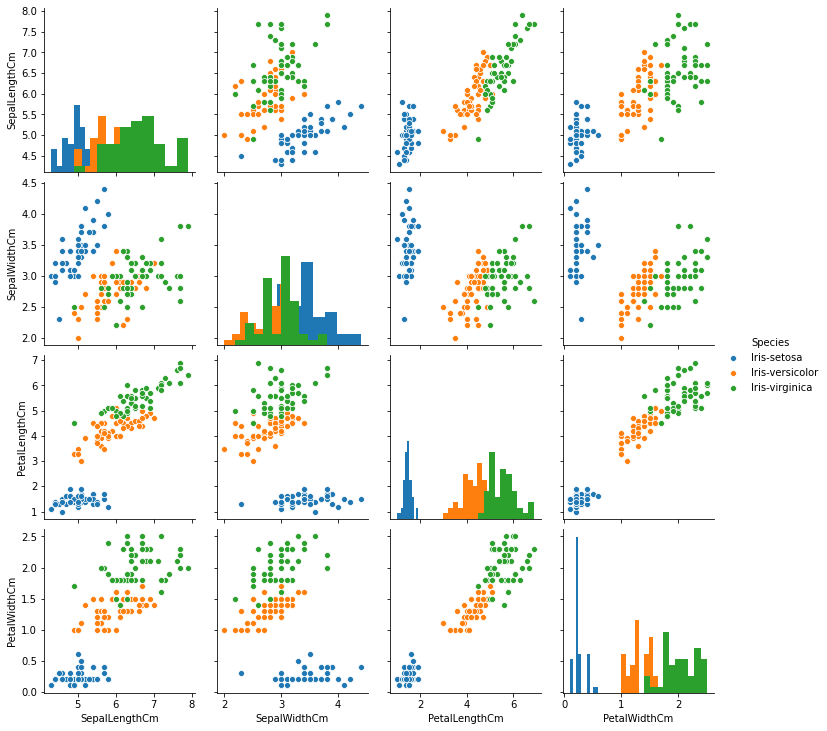

In [7]:
#Pair-Plot
sns.pairplot(df, hue = 'Species', diag_kind = 'hist')
plt.plot()

[]

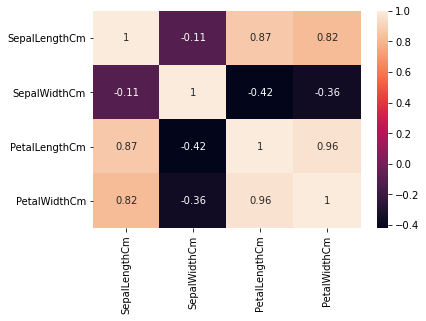

In [8]:
#Correlation
sns.heatmap(df.corr(), annot = True)
plt.plot()

### Finding the optimum number of clusters for k-means classification

In [9]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss=[]             #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the results onto a line graph to observe 'The Elbow'


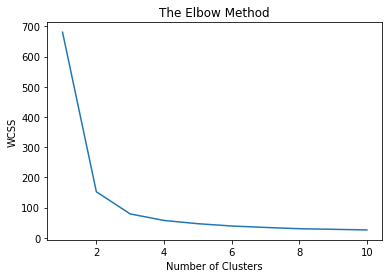

In [10]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this, we choose the <b>number of clusters as 3</b>

### Creating the KMeans Classifier

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On the first two columns

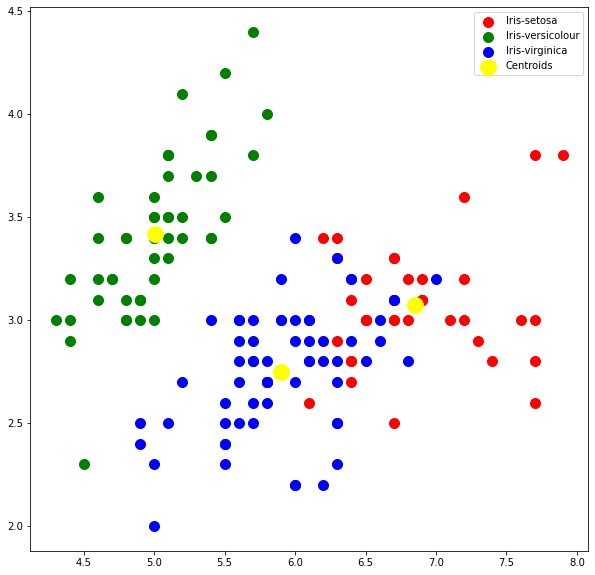

In [12]:
#Plotting CLusters
plt.rcParams["figure.figsize"] = 10, 10

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label ='Iris-virginica')

#Plotting Centroids of the CLusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()